# Numpy

This part outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and in a wide range of formats, including collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, many datasets can be represented fundamentally as arrays of numbers.

For example, images—particularly digital images—can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
Sound clips can be thought of as one-dimensional arrays of intensity versus time.
Text can be converted in various ways into numerical representations, such as binary digits representing the frequency of certain words or pairs of words.
No matter what the data is, the first step in making it analyzable will be to transform it into arrays of numbers.


For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package and the Pandas package

This part  will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in `list` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science and analysis interests you.


In [2]:
import numpy
numpy.__version__

'1.26.4'

In [3]:
import numpy as np

In [5]:
np??

Now we can use `np.array` to create arrays from Python lists:

In [6]:
# Integer array
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy arrays can only contain data of the same type.
If the types do not match, NumPy will upcast them according to its type promotion rules; here, integers are upcast to floating point:

In [7]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the `dtype` keyword:

In [8]:
np.array([1, 2, 3, 4], dtype=np.float32)

array([1., 2., 3., 4.], dtype=float32)

Finally, unlike Python lists, which are always one-dimensional sequences, NumPy arrays can be multidimensional. Here's one way of initializing a multidimensional array using a list of lists:

In [9]:
# Nested lists result in multidimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

The inner lists are treated as rows of the resulting two-dimensional array.

## Creating Arrays from Scratch

Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.
Here are several examples:

In [10]:
# Create a length-10 integer array filled with 0s
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# Create a 3x5 floating-point array filled with 1s
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [13]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [14]:
# Create an array filled with a linear sequence
# starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [15]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [16]:
# Create a 3x3 array of uniformly distributed
# pseudorandom values between 0 and 1
np.random.random((3, 3))

array([[0.16607862, 0.95649017, 0.34800842],
       [0.163709  , 0.90587923, 0.20212046],
       [0.38956956, 0.95592005, 0.57066501]])

In [17]:
# Create a 3x3 array of normally distributed pseudorandom
# values with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 0.60446191,  0.03015392,  0.97269875],
       [-0.40163258,  0.28172195,  2.16644058],
       [ 0.0433131 ,  0.6517082 ,  0.13330329]])

In [18]:
# Create a 3x3 array of pseudorandom integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[2, 0, 9],
       [5, 5, 6],
       [4, 1, 6]])

In [19]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	 | Description |
|-------------|-------------|
| `bool_`     | Boolean (True or False) stored as a byte |
| `int_`      | Default integer type (same as C `long`; normally either `int64` or `int32`)|
| `intc`      | Identical to C `int` (normally `int32` or `int64`)|
| `intp`      | Integer used for indexing (same as C `ssize_t`; normally either `int32` or `int64`)|
| `int8`      | Byte (–128 to 127)|
| `int16`     | Integer (–32768 to 32767)|
| `int32`     | Integer (–2147483648 to 2147483647)|
| `int64`     | Integer (–9223372036854775808 to 9223372036854775807)|
| `uint8`     | Unsigned integer (0 to 255)|
| `uint16`    | Unsigned integer (0 to 65535)|
| `uint32`    | Unsigned integer (0 to 4294967295)|
| `uint64`    | Unsigned integer (0 to 18446744073709551615)|
| `float_`    | Shorthand for `float64`|
| `float16`   | Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa|
| `float32`   | Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa|
| `float64`   | Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa|
| `complex_`  | Shorthand for `complex128`|
| `complex64` | Complex number, represented by two 32-bit floats|
| `complex128`| Complex number, represented by two 64-bit floats|

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the values of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining random arrays of one, two, and three dimensions.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [20]:
import numpy as np
rng = np.random.default_rng(seed=42)  # seed for reproducibility

x1 = rng.integers(10, size=6)  # one-dimensional array
x2 = rng.integers(10, size=(3, 4))  # two-dimensional array
x3 = rng.integers(10, size=(3, 4, 5))  # three-dimensional array

Each array has attributes including `ndim` (the number of dimensions), `shape` (the size of each dimension), `size` (the total size of the array), and `dtype` (the type of each element):

In [21]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:   ", x3.dtype)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype:    int64


## Array Indexing: Accessing Single Elements

In [24]:
print(x1)
print(x1[0])
print(x1[4])

[0 7 6 4 4 8]
0
4


To index from the end of the array, you can use negative indices:

In [26]:
print(x1[-1])
print(x1[-2])

8
4


Access an item in multidimentional array





In [27]:
x2

array([[0, 6, 2, 0],
       [5, 9, 7, 7],
       [7, 7, 5, 1]])

In [31]:
print(x2[0, 0])
print(x2[2,1])
print(x2[2, -1])

0
7
1


Values can also be modified using any of the preceding index notation:

In [32]:
x2[0, 0] = 12
x2

array([[12,  6,  2,  0],
       [ 5,  9,  7,  7],
       [ 7,  7,  5,  1]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value into an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [33]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 7, 6, 4, 4, 8])

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (`:`) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array `x`, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values `start=0`, `stop=<size of dimension>`, `step=1`.
Let's look at some examples of accessing subarrays in one dimension and in multiple dimensions.

### One-Dimensional Subarrays

Here are some examples of accessing elements in one-dimensional subarrays:

In [34]:
print(x1)
print(x1[:3]) # first three elements
print(x1[3:]) # elements after index 3
print(x1[1:4]) # middle subarray
print(x1[::2]) # every second element
print(x1[1::2]) # every second element, starting at index
print(x1[::-1]) # all elements, reversed
print(x1[4::-2]) # every second element from index 4, reversed

[3 7 6 4 4 8]
[3 7 6]
[4 4 8]
[7 6 4]
[3 6 4]
[7 4 8]
[8 4 4 6 7 3]
[4 6 3]


### Multidimensional Subarrays

Multidimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [40]:
print(x2)
print('------------')
print(x2[:2, :3]) # first two rows & three columns
print('------------')
print(x2[:3, ::2]) # three rows, every second column
print('------------')
print(x2[::-1, ::-1]) # all rows & columns, reversed

[[12  6  2  0]
 [ 5  9  7  7]
 [ 7  7  5  1]]
------------
[[12  6  2]
 [ 5  9  7]]
------------
[[12  2]
 [ 5  7]
 [ 7  5]]
------------
[[ 1  5  7  7]
 [ 7  7  9  5]
 [ 0  2  6 12]]


#### Accessing array rows and columns

One commonly needed routine is accessing single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (`:`):

In [42]:
print(x2)
print('------------')

print(x2[:, 0]) # first column of x2
print('------------')

print(x2[0, :]) # first row of x2

[[12  6  2  0]
 [ 5  9  7  7]
 [ 7  7  5  1]]
------------
[12  5  7]
------------
[12  6  2  0]


### Subarrays as No-Copy Views

Unlike Python list slices, NumPy array slices are returned as *views* rather than *copies* of the array data.
Consider our two-dimensional array from before:

In [43]:
print(x2)

[[12  6  2  0]
 [ 5  9  7  7]
 [ 7  7  5  1]]


Let's extract a $2 \times 2$ subarray from this:

In [44]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  6]
 [ 5  9]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [45]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  6]
 [ 5  9]]


In [46]:
print(x2)

[[99  6  2  0]
 [ 5  9  7  7]
 [ 7  7  5  1]]


Some users may find this surprising, but it can be advantageous: for example, when working with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating Copies of Arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the `copy` method:

In [47]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  6]
 [ 5  9]]


If we now modify this subarray, the original array is not touched:

In [48]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  6]
 [ 5  9]]


In [49]:
print(x2)

[[99  6  2  0]
 [ 5  9  7  7]
 [ 7  7  5  1]]


## Reshaping of Arrays

Another useful type of operation is reshaping of arrays, which can be done with the `reshape` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [50]:
grid = np.arange(1, 10).reshape(3, 3)
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array, and in most cases the `reshape` method will return a no-copy view of the initial array.

A common reshaping operation is converting a one-dimensional array into a two-dimensional row or column matrix:

In [51]:
x = np.array([1, 2, 3])
x.reshape((1, 3))  # row vector via reshape

array([[1, 2, 3]])

In [52]:
x.reshape((3, 1))  # column vector via reshape

array([[1],
       [2],
       [3]])

A convenient shorthand for this is to use `np.newaxis` in the slicing syntax:

In [54]:
x[np.newaxis, :] # row vector via newaxis

array([[1, 2, 3]])

In [55]:
x[:, np.newaxis]  # column vector via newaxis

array([[1],
       [2],
       [3]])

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. NumPy also provides tools to combine multiple arrays into one, and to conversely split a single array into multiple arrays.

### Concatenation of Arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines `np.concatenate`, `np.vstack`, and `np.hstack`.
`np.concatenate` takes a tuple or list of arrays as its first argument, as you can see here:

In [56]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [57]:
z = np.array([99, 99, 99])
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


And it can be used for two-dimensional arrays:

In [59]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [60]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [61]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the `np.vstack` (vertical stack) and `np.hstack` (horizontal stack) functions:

In [62]:
# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [63]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 99]])

Similarly, for higher-dimensional arrays, `np.dstack` will stack arrays along the third axis.

### Splitting of Arrays

The opposite of concatenation is splitting, which is implemented by the functions `np.split`, `np.hsplit`, and `np.vsplit`.  For each of these, we can pass a list of indices giving the split points:

In [64]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [65]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [66]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [67]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, for higher-dimensional arrays, `np.dsplit` will split arrays along the third axis.

# Aggregations: min, max, and Everything in Between

A first step in exploring any dataset is often to compute various summary statistics.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregations are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and try out some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in `sum` function:

In [68]:
import numpy as np
rng = np.random.default_rng()

In [69]:
L = rng.random(100)
sum(L)

50.30840085231082

The syntax is quite similar to that of NumPy's `sum` function, and the result is the same in the simplest case:

In [72]:
np.sum(L)

50.30840085231082

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [73]:
big_array = rng.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

102 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
348 µs ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Be careful, though: the `sum` function and the `np.sum` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings (`sum(x, 1)` initializes the sum at `1`, while `np.sum(x, 1)` sums along axis `1`), and `np.sum` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in `min` and `max` functions, used to find the minimum value and maximum value of any given array:

In [74]:
min(big_array), max(big_array)

(1.9067108533166177e-06, 0.9999988490450046)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [75]:
np.min(big_array), np.max(big_array)

(1.9067108533166177e-06, 0.9999988490450046)

In [76]:
%timeit min(big_array)
%timeit np.min(big_array)

63.2 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
369 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For `min`, `max`, `sum`, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [77]:
print(big_array.min(), big_array.max(), big_array.sum())

1.9067108533166177e-06 0.9999988490450046 499991.2637481475


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multidimensional Aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [78]:
M = rng.integers(0, 10, (3, 4))
print(M)

[[7 7 6 5]
 [9 3 9 9]
 [5 2 5 4]]


NumPy aggregations will apply across all elements of a multidimensional array:

In [79]:
M.sum()

71

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying `axis=0`:

In [80]:
M.min(axis=0)

array([5, 2, 5, 4])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [81]:
M.max(axis=1)

array([7, 9, 5])

The way the axis is specified here can be confusing to users coming from other languages.
The `axis` keyword specifies the dimension of the array that will be *collapsed*, rather than the dimension that will be returned.
So, specifying `axis=0` means that axis 0 will be collapsed: for two-dimensional arrays, values within each column will be aggregated.

### Other Aggregation Functions

NumPy provides several other aggregation functions with a similar API, and additionally most have a `NaN`-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point `NaN` value (see [Handling Missing Data](03.04-Missing-Values.ipynb)).

The following table provides a list of useful aggregation functions available in NumPy:

|Function name    |   NaN-safe version| Description                                   |
|-----------------|-------------------|-----------------------------------------------|
| `np.sum`        | `np.nansum`       | Compute sum of elements                       |
| `np.prod`       | `np.nanprod`      | Compute product of elements                   |
| `np.mean`       | `np.nanmean`      | Compute mean of elements                      |
| `np.std`        | `np.nanstd`       | Compute standard deviation                    |
| `np.var`        | `np.nanvar`       | Compute variance                              |
| `np.min`        | `np.nanmin`       | Find minimum value                            |
| `np.max`        | `np.nanmax`       | Find maximum value                            |
| `np.argmin`     | `np.nanargmin`    | Find index of minimum value                   |
| `np.argmax`     | `np.nanargmax`    | Find index of maximum value                   |
| `np.median`     | `np.nanmedian`    | Compute median of elements                    |
| `np.percentile` | `np.nanpercentile`| Compute rank-based statistics of elements     |
| `np.any`        | N/A               | Evaluate whether any elements are true        |
| `np.all`        | N/A               | Evaluate whether all elements are true        |

You will see these aggregates often throughout the rest of the book.

## Example: What Is the Average Height of US Presidents?

Aggregates available in NumPy can act as summary statistics for a set of values.
As a small example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a comma-separated list of labels and values:

In [84]:
!head -4 president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We'll use the Pandas package to read the file and extract this information:

In [85]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


Now that we have this data array, we can compute a variety of summary statistics:

In [86]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [87]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.75
Median:             182.0
75th percentile:    183.5


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib. For example, this code generates the following chart:

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

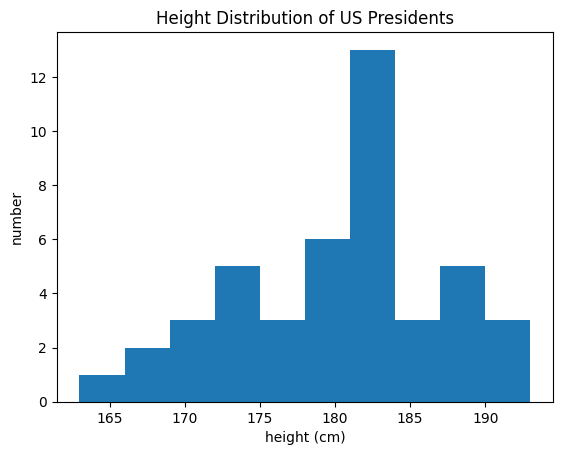

In [90]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

**some really important info of usint basic operators with np. which is more efficient on large data**

[computation-on-arrays-ufuncs](https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html)

**some Fancy Indexing and a little vizualization**

[fancy-indexing](https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html)

**some Sorting with np., sorting can be a head ache and np is a great tool for it**

[sorting](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html)

**and some structure data with np (very usefull for efficient processing)**

[structured-data-numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html)